<a href="https://colab.research.google.com/github/Deekshithagoud/Vaarahipo1/blob/main/Vaarahipocc1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd


In [5]:
crop = pd.read_csv("Dataset2.csv")

In [6]:
crop.head()

,Location,SoilType,Water availability,Time of starting,Label
0,1,1,1,January,1
1,1,1,1,February,1
2,1,1,1,March,1
3,1,1,1,April,1
4,1,1,1,May,1


In [7]:
crop.shape

(576, 5)

In [8]:
crop.info

<bound method DataFrame.info of      Location  SoilType  Water availability Time of starting  Label
0           1         1                   1          January      1
1           1         1                   1         February      1
2           1         1                   1            March      1
3           1         1                   1            April      1
4           1         1                   1              May      1
..        ...       ...                 ...              ...    ...
571         4         4                   3           August     10
572         4         4                   3        September     10
573         4         4                   3        September     10
574         4         4                   3         November     10
575         4         4                   3         December     10

[576 rows x 5 columns]>

In [9]:
crop.isnull().sum()

Location              0
SoilType              0
Water availability    0
Time of starting      0
Label                 0
dtype: int64

In [10]:
crop.describe

<bound method NDFrame.describe of      Location  SoilType  Water availability Time of starting  Label
0           1         1                   1          January      1
1           1         1                   1         February      1
2           1         1                   1            March      1
3           1         1                   1            April      1
4           1         1                   1              May      1
..        ...       ...                 ...              ...    ...
571         4         4                   3           August     10
572         4         4                   3        September     10
573         4         4                   3        September     10
574         4         4                   3         November     10
575         4         4                   3         December     10

[576 rows x 5 columns]>

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

In [12]:
df = pd.read_csv('Dataset2.csv')

In [31]:
df.head()

,Location,SoilType,Water availability,Time of starting,Label
0,1,1,1,January,1
1,1,1,1,February,1
2,1,1,1,March,1
3,1,1,1,April,1
4,1,1,1,May,1


In [32]:

X = df.drop(columns=['Label'],axis=1)

In [33]:
X.head()

,Location,SoilType,Water availability,Time of starting
0,1,1,1,January
1,1,1,1,February
2,1,1,1,March
3,1,1,1,April
4,1,1,1,May


In [34]:
print("Categories in 'Time of starting' variable:     ",end=" " )
print(df['Time of starting'].unique())

print("Categories in 'Label' variable:  ",end=" ")
print(df['Label'].unique())

print("Location' variable:",end=" " )
print(df['Location'].unique())


Categories in 'Time of starting' variable:      ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
Categories in 'Label' variable:   [ 1  2  3  4  5  6  7  8  9 10]
Location' variable: [1 2 3 4]


In [35]:
y = df['Label']

In [36]:
y

0       1
1       1
2       1
3       1
4       1
       ..
571    10
572    10
573    10
574    10
575    10
Name: Label, Length: 576, dtype: int64

In [37]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [38]:
X = preprocessor.fit_transform(X)

In [39]:

X.shape

(576, 15)

In [40]:

# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=52)
X_train.shape, X_test.shape

((460, 15), (116, 15))

In [41]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [43]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.5107
- Mean Absolute Error: 0.4066
- R2 Score: 0.9678
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5334
- Mean Absolute Error: 0.4263
- R2 Score: 0.9652


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.3096
- Mean Absolute Error: 1.0723
- R2 Score: 0.7884
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.3534
- Mean Absolute Error: 1.0851
- R2 Score: 0.7761


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.5107
- Mean Absolute Error: 0.4068
- R2 Score: 0.9678
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5332
- Mean Absolute Error: 0.4268
- R2 Score: 0.9653


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.6592
- Mean Absolute Error: 0.5443
- R2 Score: 0.9464
-----------------------

In [44]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.993433
4,Decision Tree,0.990516
6,XGBRegressor,0.988529
7,AdaBoost Regressor,0.978016
2,Ridge,0.965254
0,Linear Regression,0.965221
3,K-Neighbors Regressor,0.902845
1,Lasso,0.776111


In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Initialize RandomForestRegressor with desired parameters
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the RandomForestRegressor model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate the R^2 score to evaluate the model
score_rf = r2_score(y_test, y_pred_rf) * 100
print("Accuracy of the Random Forest Regressor model is %.2f" % score_rf)


Accuracy of the Random Forest Regressor model is 99.35


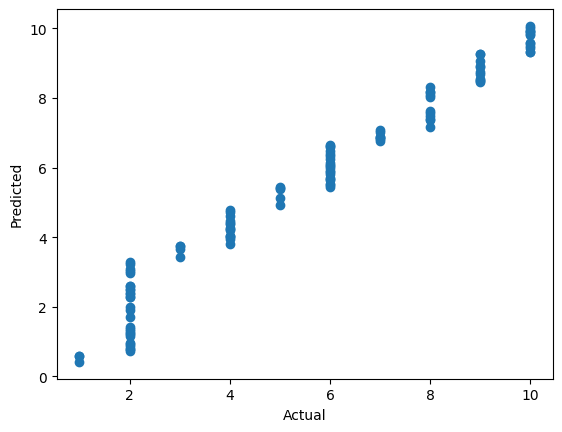

In [50]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

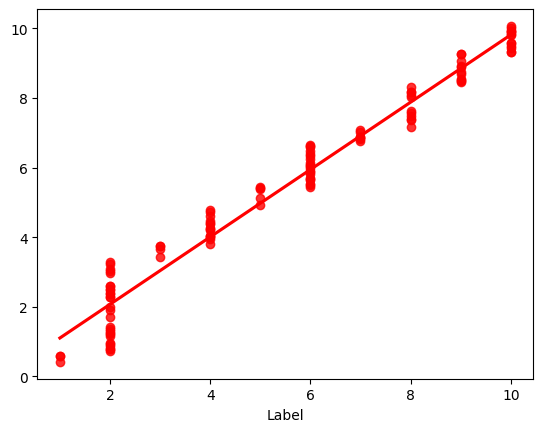

In [51]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [52]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
198,3,3.755144,-0.755144
316,6,5.716527,0.283473
52,2,1.223679,0.776321
313,6,5.660765,0.339235
19,2,0.734270,1.265730
...,...,...,...
113,2,2.285327,-0.285327
329,6,5.985534,0.014466
8,1,0.595578,0.404422
302,6,5.496394,0.503606
